In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import copy
import matplotlib
%matplotlib inline
sys.path.append("..")
from demo_2_awac import och_2_awac
import adept_envs
import gym
env = gym.make("franka_cabinet_slider_knob_switch_toaster_resetfree-v1")

all_paths = ['/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_0.pkl',
            '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_1.pkl',
            '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_2.pkl',
            '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_3.pkl',
            '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_4.pkl',
             '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_5.pkl',
             '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_6.pkl',
             '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_7.pkl',
            '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/recordings/recording_8.pkl',]
             
dat = []

for p in all_paths:
    dat_curr = pickle.load(open(p, 'rb'))
    dat += dat_curr
print(len(dat))


982


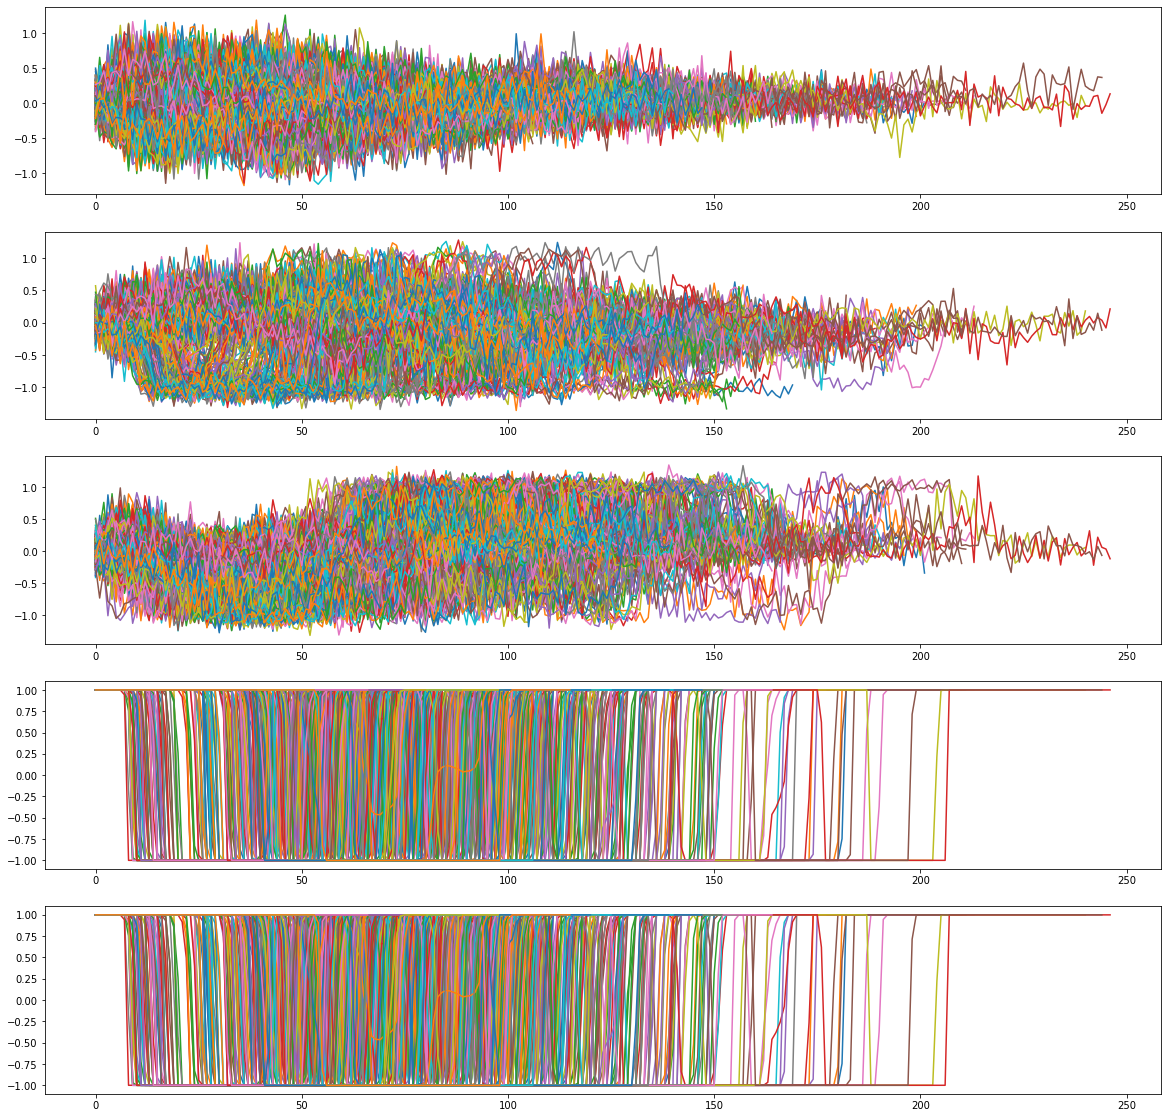

In [2]:
list_awac = och_2_awac(dat)
for path in list_awac:
    mocap_poss = []
    for i in range(path['observations'].shape[0]):
        nmp = path['observations'][i, 8:11] + path['actions'][i, :3]*env.env.range
        nmp = np.clip(nmp, env.env.mocap_pos_clip_lower, env.env.mocap_pos_clip_upper)
        meanval = (env.env.mocap_pos_clip_upper + env.env.mocap_pos_clip_lower)/2.0
        rng = (env.env.mocap_pos_clip_upper - env.env.mocap_pos_clip_lower)/2.0
        nmp = (nmp - meanval)/rng
        mocap_poss.append(nmp)
    mocap_poss = np.array(mocap_poss)
    mocap_poss = np.concatenate([path['actions'][:, :3], path['actions'][:, -2:]], axis=-1)
    path['actions'] = mocap_poss
    #print(path['actions'].shape)
fig,  ax = plt.subplots(5, figsize=(20, 20))
for p in list_awac:
    for i in range(5):  
        ax[i].plot(p['actions'][:, i])
plt.show()

In [3]:
import itertools

def check_goal_completion(curr_pos):
    broken = False
    max_objs = np.array([-0.25, -0.25, 0.2, 0.75, 1.1, -0.07])
    min_objs = np.array([-0.6, -0.6, 0.08, 0.1, 0.1, -0.21])
    init_bitflips = np.array([0, 0, 0, 0, 0, 0])
    curr_bitflips = init_bitflips.copy()
    if len(curr_pos.shape) > 1:
        curr_pos = curr_pos.squeeze(axis=0)
    for j in range(6):
        if curr_pos[j] > max_objs[j]:
            curr_bitflips[j] = 1
        elif curr_pos[j] < min_objs[j]:
            curr_bitflips[j] = 0
        else:
            broken = True
    mult = np.array([2**i for i in range(6)])[::-1]
    new_idx = np.sum(mult*curr_bitflips)
    return new_idx, broken

s, _ = check_goal_completion(list_awac[0]['observations'][0, 2:8])
g, _ = check_goal_completion(list_awac[0]['observations'][-1, 2:8])
print("Start %d"%s)
print("goal %d"%g)

Start 1
goal 5


In [4]:
good_paths = []
for i, p in enumerate(list_awac):
    start_idx, b = check_goal_completion(p['observations'][0, 2:8])
    end_idx, b1 = check_goal_completion(p['observations'][-1, 2:8])
    if b or b1: 
        continue
    good_paths.append(p)
len(good_paths)

970

In [5]:
# curr_x = 0
# plt.clf()
# plt.cla()
# max_objs = np.array([-0.2, -0.2, 0.2, 0.75, 1.1, -0.07])
# min_objs = np.array([-0.6, -0.6, 0.08, 0.1, 0.1, -0.21])
# fig, ax = plt.subplots(3, 5, figsize=(20, 20))
# for p in good_paths:
#     for i in range(3):  
#         for j in range(5):
#             ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
# plt.show()
list_awac = good_paths

At demo 0 of 970
At demo 1 of 970
At demo 2 of 970
At demo 3 of 970
At demo 4 of 970
At demo 5 of 970
At demo 6 of 970
At demo 7 of 970
At demo 8 of 970
At demo 9 of 970
At demo 10 of 970
At demo 11 of 970
At demo 12 of 970
At demo 13 of 970
At demo 14 of 970
At demo 15 of 970
At demo 16 of 970
At demo 17 of 970
At demo 18 of 970
At demo 19 of 970
At demo 20 of 970
At demo 21 of 970
At demo 22 of 970
At demo 23 of 970
At demo 24 of 970
At demo 25 of 970
At demo 26 of 970
At demo 27 of 970
At demo 28 of 970
At demo 29 of 970
At demo 30 of 970
At demo 31 of 970
At demo 32 of 970
At demo 33 of 970
At demo 34 of 970
At demo 35 of 970
At demo 36 of 970
At demo 37 of 970
At demo 38 of 970
At demo 39 of 970
At demo 40 of 970
At demo 41 of 970
At demo 42 of 970
At demo 43 of 970
At demo 44 of 970
At demo 45 of 970
At demo 46 of 970
At demo 47 of 970
At demo 48 of 970
At demo 49 of 970
At demo 50 of 970
At demo 51 of 970
At demo 52 of 970
At demo 53 of 970
At demo 54 of 970
At demo 55 of 970
At

At demo 437 of 970
At demo 438 of 970
At demo 439 of 970
At demo 440 of 970
At demo 441 of 970
At demo 442 of 970
At demo 443 of 970
At demo 444 of 970
At demo 445 of 970
At demo 446 of 970
At demo 447 of 970
At demo 448 of 970
At demo 449 of 970
At demo 450 of 970
At demo 451 of 970
At demo 452 of 970
At demo 453 of 970
At demo 454 of 970
At demo 455 of 970
At demo 456 of 970
At demo 457 of 970
At demo 458 of 970
At demo 459 of 970
At demo 460 of 970
At demo 461 of 970
At demo 462 of 970
At demo 463 of 970
At demo 464 of 970
At demo 465 of 970
At demo 466 of 970
At demo 467 of 970
At demo 468 of 970
At demo 469 of 970
At demo 470 of 970
At demo 471 of 970
At demo 472 of 970
At demo 473 of 970
At demo 474 of 970
At demo 475 of 970
At demo 476 of 970
At demo 477 of 970
At demo 478 of 970
At demo 479 of 970
At demo 480 of 970
At demo 481 of 970
At demo 482 of 970
At demo 483 of 970
At demo 484 of 970
At demo 485 of 970
At demo 486 of 970
At demo 487 of 970
At demo 488 of 970
At demo 489 

At demo 869 of 970
At demo 870 of 970
At demo 871 of 970
At demo 872 of 970
At demo 873 of 970
At demo 874 of 970
At demo 875 of 970
At demo 876 of 970
At demo 877 of 970
At demo 878 of 970
At demo 879 of 970
At demo 880 of 970
At demo 881 of 970
At demo 882 of 970
At demo 883 of 970
At demo 884 of 970
At demo 885 of 970
At demo 886 of 970
At demo 887 of 970
At demo 888 of 970
At demo 889 of 970
At demo 890 of 970
At demo 891 of 970
At demo 892 of 970
At demo 893 of 970
At demo 894 of 970
At demo 895 of 970
At demo 896 of 970
At demo 897 of 970
At demo 898 of 970
At demo 899 of 970
At demo 900 of 970
At demo 901 of 970
At demo 902 of 970
At demo 903 of 970
At demo 904 of 970
At demo 905 of 970
At demo 906 of 970
At demo 907 of 970
At demo 908 of 970
At demo 909 of 970
At demo 910 of 970
At demo 911 of 970
At demo 912 of 970
At demo 913 of 970
At demo 914 of 970
At demo 915 of 970
At demo 916 of 970
At demo 917 of 970
At demo 918 of 970
At demo 919 of 970
At demo 920 of 970
At demo 921 

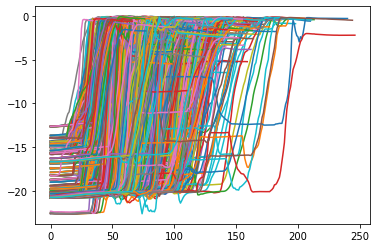

5
5
5
5
9
9
9
9
9
3
3
3
3
3
6
6
6
6
1
1
1
1
1
7
7
7
7
7
11
11
11
11
11
19
19
19
19
19
35
35
35
35
35
1
1
1
1
1
7
7
7
7
7
13
13
13
13
13
21
21
21
21
21
37
37
37
37
37
2
2
2
2
2
7
7
7
7
7
14
14
14
14
14
38
38
38
38
38
3
3
3
3
3
5
5
5
5
5
5
5
6
6
6
6
6
15
15
15
15
15
39
39
39
39
39
13
13
13
13
13
25
25
25
25
25
41
41
41
41
41
2
2
2
2
2
11
11
11
11
11
14
14
14
14
14
42
42
42
42
42
3
3
3
3
3
9
9
9
9
9
15
15
15
15
15
43
43
43
43
43
5
5
5
5
15
15
15
15
15
45
45
45
45
45
6
6
6
6
6
10
10
10
10
10
15
15
15
15
15
30
30
30
30
30
46
46
46
46
46
7
7
7
7
7
11
11
11
11
13
13
13
13
13
14
14
14
14
14
47
47
47
47
47
1
1
1
1
1
21
21
21
21
21
25
25
25
25
25
2
2
2
2
2
19
19
19
19
19
22
22
22
22
22
26
26
26
26
26
50
50
50
50
50
3
3
3
3
3
17
17
17
17
17
23
23
23
23
23
27
27
27
27
27
51
51
51
51
51
23
23
23
23
23
29
29
29
29
29
53
53
53
53
53
18
18
18
18
18
23
23
23
23
23
30
30
30
30
30
54
54
54
54
54
7
7
7
7
7
19
19
19
19
19
21
21
21
21
21
22
22
22
22
31
31
31
31
31
27
27
27
27
27
29
29
29
29
29
57
57
57
57
5

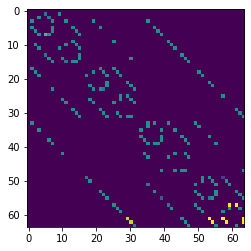

In [6]:
idx_completion = False
def end_relabel(env, path):
    o_size = 11
    path['observations'] = path['observations'][:, :o_size]
    path['next_observations'] = path['next_observations'][:, :o_size]
    
#     path['observations'][:, o_size:] = path['observations'][-1, :o_size].copy()
#     path['next_observations'][:, o_size:] = path['observations'][-1, :o_size]
    
    goal_idx, _ = check_goal_completion(path['observations'][-1, 2:8])
    concat_val = np.zeros((path['observations'].shape[0], 1))
    concat_val[:, 0] = goal_idx
    path['observations'] = np.concatenate([path['observations'], concat_val.copy()], axis=-1)
    path['next_observations'] = np.concatenate([path['next_observations'], concat_val.copy()], axis=-1)
    
    env.env._goal_idx, _ = check_goal_completion(path['observations'][-1, 2:8])
    env.env._current_idx, _ = check_goal_completion(path['observations'][0, 2:8])
    env.env.goal = concat_val.copy()  #path['observations'][-1, :o_size].copy()
    env.env._idx_completion = idx_completion
    path['rewards'] = np.zeros_like(path['rewards'])

    for idx in range(len(path['observations'])):
        env.env.sim.data.mocap_pos[:] = path['observations'][idx][8:11].copy()
#         env.env.sim.data.mocap_quat[:] = path['observations'][idx][11:15].copy()
        env.env.sim.data.qpos[9:15] = path['observations'][idx][2:8].copy()
        for _ in range(10):
            env.env.sim.forward()
            env.env.sim.step()
#         env.env.render()
#         for i in range(3):  
#             for j in range(5):
#                 ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
        reward_dict = env.env.get_reward_dict(None, {'mocap_pos': path['observations'][idx:idx+1, 8:11],
                                                     'obj_qp': path['observations'][idx:idx+1, 2:8]})
        path['rewards'][idx] = np.sum([v for k, v in reward_dict.items()])
    return path


# list_awac = och_2_awac(dat)
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
curr_x = 0  
label_list = itertools.product(['Sw1C', 'Sw1O'], 
                               ['Sw2C', 'Sw2O'], 
                               ['SC', 'SO'], 
                               ['CC', 'CO'], 
                               ['ToC', 'ToO'], 
                               ['TrC', 'TrO'])
tasks = ['-'.join(s) for s in label_list]
# tasks = ['CC', 'CO', 'OC', 'OO']
task_list = []
adjacency_matrix = np.zeros((64, 64))
labeled_goals = [[] for _ in range(64)]
counts_starts = np.zeros(64)
counts_goals = np.zeros(64)
end_states = [None for _ in range(64)]
path_lists = [[[] for _ in range(64)] for _ in range(64)]
filtered_paths = []
for i, path in enumerate(list_awac):
    start_idx, _ = check_goal_completion(path['observations'][0, 2:8])
    end_idx, _ = check_goal_completion(path['observations'][-1, 2:8])
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    print("At demo %d of %d"%(i, len(list_awac)))
    end_relabel(env, path)
    plt.plot(path['rewards'])
    filtered_paths.append(path)
plt.show()
    
for p in list_awac:
    curr_x += len(p['observations'])
    start_idx, _ = check_goal_completion(p['observations'][0, 2:8])
    start = tasks[start_idx]
    end_idx, _ = check_goal_completion(p['observations'][-1, 2:8])
    print(end_idx)
    if start_idx == end_idx:
        print("FOUND A BROKEN DEMO")
        continue
    end = tasks[end_idx]
    adjacency_matrix[start_idx, end_idx] += 1
    path_lists[start_idx][end_idx].append(copy.deepcopy(p))
    task_list.append(check_goal_completion(p['observations'][-1, 2:8]))
    labeled_goals[end_idx].append(p['observations'][-1])
    counts_goals[end_idx] += 1
    counts_starts[start_idx] += 1
    if end_states[end_idx] is None:
        ei_val = np.zeros(1)
        ei_val[0] = end_idx
        end_states[end_idx] = ei_val.copy() #p['observations'][-1, :15]
plt.show() 

plt.imshow(adjacency_matrix)
plt.show()

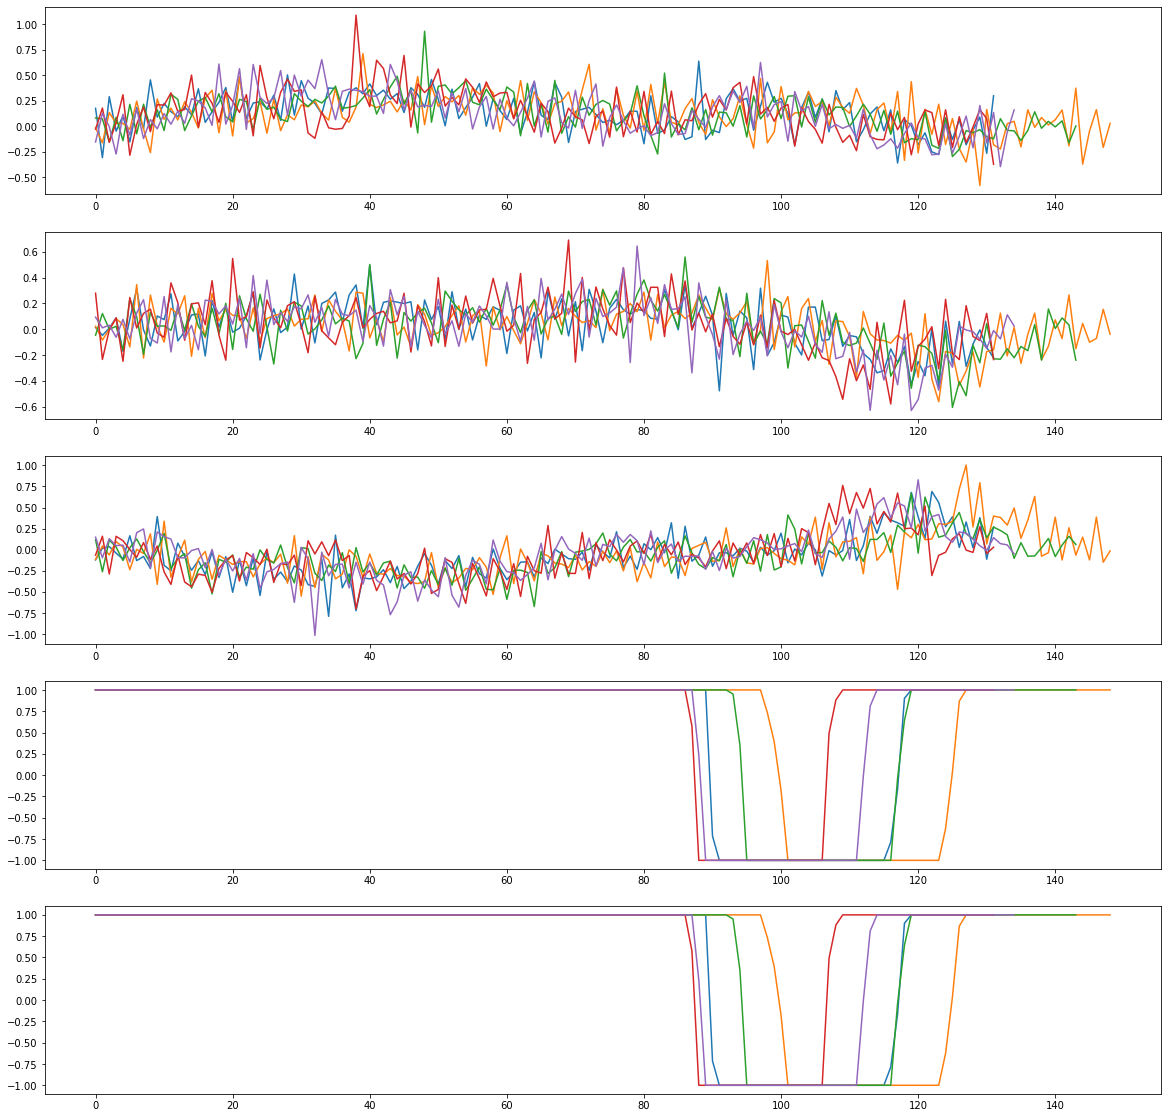

(132, 12)


In [9]:
curr_x = 0
fig, ax = plt.subplots(5, figsize=(20, 20))
for p in path_lists[3][19]:
    for j in range(5):
        ax[j].plot(p['actions'][:, j])
plt.show()
print(path_lists[3][19][0]['observations'].shape)
pickle.dump(path_lists[3][19], open('June10_data_319_sim_1elem_deltapos_noredundancy.pkl', 'wb'))

In [ ]:
pickle.dump(filtered_paths, open('demo_list_6element_hardware_noredundancy.pkl', 'wb'))

In [ ]:
filtered_paths[0]['actions'].shape

In [ ]:
c = 0
for p in filtered_paths:
    c += p['observations'].shape[0]
print(c)